In [18]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Step 1: Load and Merge Data
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
customers.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [22]:
# Aggregate Transactional Data
transaction_summary = transactions.groupby('CustomerID').agg(
    TotalSpend=('TotalValue', 'sum'),
    AvgTransactionValue=('TotalValue', 'mean'),
    PurchaseFrequency=('TransactionID', 'count')
).reset_index()
transaction_summary.head()

,CustomerID,TotalSpend,AvgTransactionValue,PurchaseFrequency
0,C0001,3354.52,670.904,5
1,C0002,1862.74,465.685,4
2,C0003,2725.38,681.345,4
3,C0004,5354.88,669.360,8
4,C0005,2034.24,678.080,3


In [25]:
# Merge with Customer Data
data = pd.merge(customers, transaction_summary, on='CustomerID', how='inner')
data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,AvgTransactionValue,PurchaseFrequency
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,670.904,5
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,465.685,4
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,681.345,4
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,669.360,8
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,678.080,3


In [26]:
# Calculate Signup Duration
data['SignupDate'] = pd.to_datetime(data['SignupDate'])
data['SignupDuration'] = (pd.Timestamp.today() - data['SignupDate']).dt.days

data.head()

,CustomerID,CustomerName,Region,SignupDate,TotalSpend,AvgTransactionValue,PurchaseFrequency,SignupDuration
0,C0001,Lawrence Carroll,South America,2022-07-10,3354.52,670.904,5,932
1,C0002,Elizabeth Lutz,Asia,2022-02-13,1862.74,465.685,4,1079
2,C0003,Michael Rivera,South America,2024-03-07,2725.38,681.345,4,326
3,C0004,Kathleen Rodriguez,South America,2022-10-09,5354.88,669.360,8,841
4,C0005,Laura Weber,Asia,2022-08-15,2034.24,678.080,3,896


In [12]:
#  Feature Selection and Normalization
features = ['TotalSpend', 'AvgTransactionValue', 'PurchaseFrequency', 'SignupDuration']
X = data[features]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [13]:
# Determine Optimal Number of Clusters
wcss = []
for k in range(2, 11):  # Testing clusters from 2 to 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

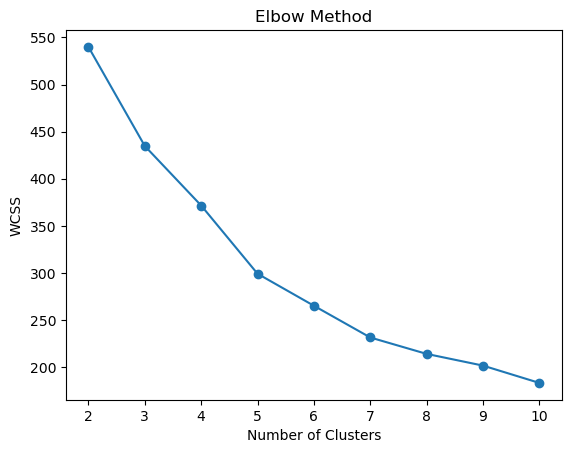

In [14]:
# Plot Elbow Method
plt.plot(range(2, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [51]:
# Fit the K-Means Model
optimal_k = 5  # Based on the elbow plot
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
data['Cluster'] = clusters

In [52]:
# Evaluate Clustering Metrics
db_index = davies_bouldin_score(X_scaled, clusters)
silhouette_avg = silhouette_score(X_scaled, clusters)

print(f"Davies-Bouldin Index: {db_index}")
print(f"Silhouette Score: {silhouette_avg}")

Davies-Bouldin Index: 1.0799074464586558
Silhouette Score: 0.29770851159535505


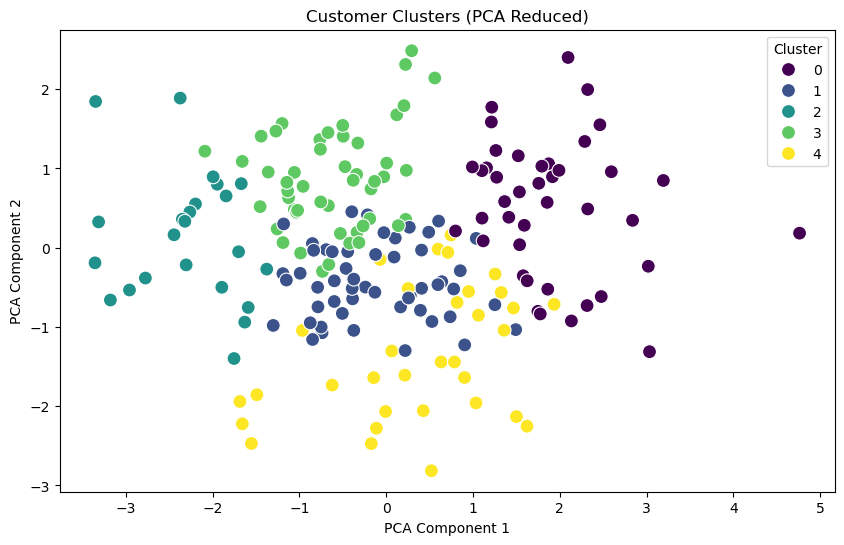

In [53]:
# Visualize Clusters (Using PCA)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Clusters (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [40]:
# Apply DBSCAN Clustering
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters = dbscan.fit_predict(X_scaled)



In [41]:
# Add cluster labels to the dataframe
data['Cluster'] = clusters

#  Evaluate Clustering Metrics
# Silhouette Score
silhouette_avg = silhouette_score(X_scaled, clusters)
print(f"Silhouette Score: {silhouette_avg}")



Silhouette Score: -0.26611181967842396


Davies-Bouldin Index: 1.7068880091204526


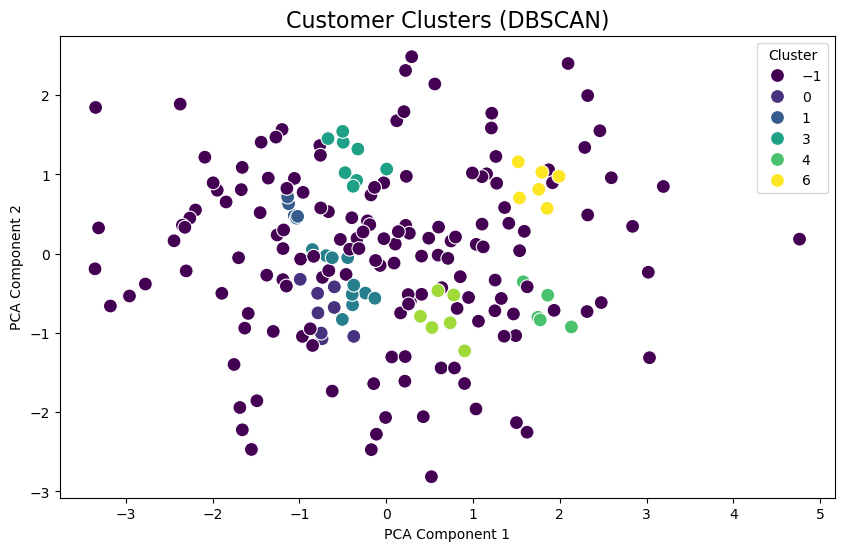

In [44]:
# Davies-Bouldin Index (DB Index)
db_index = davies_bouldin_score(X_scaled, clusters)
print(f"Davies-Bouldin Index: {db_index}")

#Step 5: Visualize Clusters (Using PCA for Dimensionality Reduction)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=data['Cluster'], palette='viridis', s=100)
plt.title('Customer Clusters (DBSCAN)', fontsize=16)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

